You are given two images, img1 and img2, represented as binary, square matrices of size n x n. A binary matrix has only 0s and 1s as values.

We translate one image however we choose by sliding all the 1 bits left, right, up, and/or down any number of units. We then place it on top of the other image. We can then calculate the overlap by counting the number of positions that have a 1 in both images.

Note also that a translation does not include any kind of rotation. Any 1 bits that are translated outside of the matrix borders are erased.

Return the largest possible overlap.

 

Example 1:

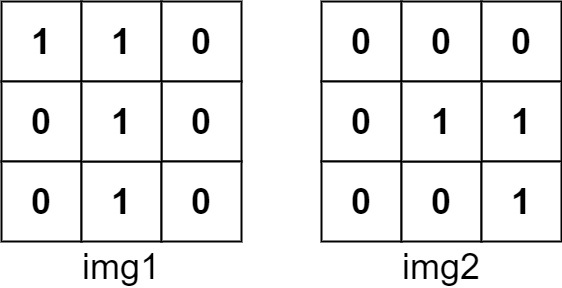

Input: img1 = [[1,1,0],[0,1,0],[0,1,0]], img2 = [[0,0,0],[0,1,1],[0,0,1]]
Output: 3
Explanation: We translate img1 to right by 1 unit and down by 1 unit.

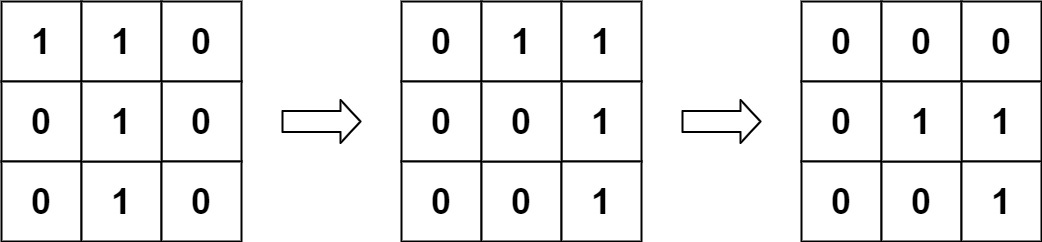

The number of positions that have a 1 in both images is 3 (shown in red).

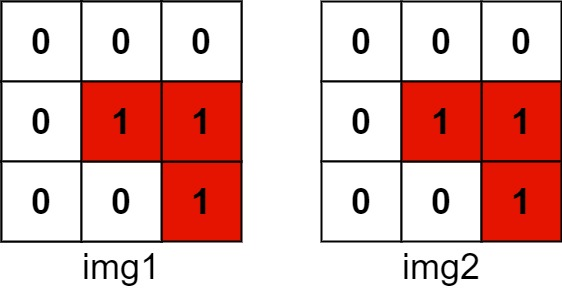

Example 2:

Input: img1 = [[1]], img2 = [[1]]
Output: 1

Example 3:

Input: img1 = [[0]], img2 = [[0]]
Output: 0

 

Constraints:

    n == img1.length == img1[i].length
    n == img2.length == img2[i].length
    1 <= n <= 30
    img1[i][j] is either 0 or 1.
    img2[i][j] is either 0 or 1.



In [ ]:
class Solution:
    def largestOverlap(self, img1: List[List[int]], img2: List[List[int]]) -> int:
        dim = len(img1)

        def non_zero_cells(M):
            ret = []
            for x in range(dim):
                for y in range(dim):
                    if M[x][y] == 1:
                        ret.append((x, y))
            return ret

        transformation_count = defaultdict(int)
        max_overlaps = 0

        A_ones = non_zero_cells(img1)
        B_ones = non_zero_cells(img2)

        for (x_a, y_a) in A_ones:
            for (x_b, y_b) in B_ones:
                vec = (x_b - x_a, y_b - y_a)
                transformation_count[vec] += 1
                max_overlaps = max(max_overlaps, transformation_count[vec])

        return max_overlaps

In [ ]:
class Solution:
    def largestOverlap(self, A: List[List[int]], B: List[List[int]]) -> int:

        dim = len(A)

        def shift_and_count(x_shift, y_shift, M, R):
            """ 
                Shift the matrix M in up-left and up-right directions 
                  and count the ones in the overlapping zone.
                M: matrix to be moved
                R: matrix for reference

                moving one matrix up is equivalent to
                moving the other matrix down
            """
            left_shift_count, right_shift_count = 0, 0
            for r_row, m_row in enumerate(range(y_shift, dim)):
                for r_col, m_col in enumerate(range(x_shift, dim)):
                    if M[m_row][m_col] == 1 and M[m_row][m_col] == R[r_row][r_col]:
                        left_shift_count += 1
                    if M[m_row][r_col] == 1 and M[m_row][r_col] == R[r_row][m_col]:
                        right_shift_count += 1

            return max(left_shift_count, right_shift_count)

        max_overlaps = 0
        # move one of the matrice up and left and vice versa.
        # (equivalent to move the other matrix down and right)
        for y_shift in range(0, dim):
            for x_shift in range(0, dim):
                # move the matrix A to the up-right and up-left directions
                max_overlaps = max(max_overlaps, shift_and_count(x_shift, y_shift, A, B))
                # move the matrix B to the up-right and up-left directions
                #  which is equivalent to moving A to the down-right and down-left directions 
                max_overlaps = max(max_overlaps, shift_and_count(x_shift, y_shift, B, A))

        return max_overlaps

In [ ]:
class Solution:
    def largestOverlap(self, A: List[List[int]], B: List[List[int]]) -> int:

        import numpy as np
        A = np.array(A)
        B = np.array(B)

        dim = len(A)
        # extend the matrix to a wider range for the later kernel extraction.
        B_padded = np.pad(B, dim-1, mode='constant', constant_values=(0, 0))

        max_overlaps = 0
        for x_shift in range(dim*2 - 1):
            for y_shift in range(dim* 2 - 1):
                # extract a kernel from the padded matrix
                kernel = B_padded[x_shift:x_shift+dim, y_shift:y_shift+dim]
                # convolution between A and kernel
                non_zeros = np.sum(A * kernel)
                max_overlaps = max(max_overlaps, non_zeros)

        return max_overlaps